[View in Colaboratory](https://colab.research.google.com/github/udithv/DeepLearning/blob/master/TensorFlow_for_simple_regression.ipynb)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

%matplotlib inline

In [0]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [0]:
noise = np.random.randn(len(x_data))

In [34]:
 x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [35]:
noise

array([-0.1599152 ,  0.40014746, -0.3432322 , ..., -0.83056116,
       -0.89432646,  2.0544229 ])

###y = mx + b
### b= 5

In [0]:
y_true = (0.5 * x_data) + 5 + noise

In [0]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])

In [0]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [39]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [40]:
y_df.head()

,Y
0,4.840085
1,5.400152
2,4.656778
3,4.979466
4,4.385836


In [0]:
  my_data = pd.concat([x_df,y_df], axis=1) #axis 1 for columns concat

In [42]:
my_data.head()

,X Data,Y
0,0.00000,4.840085
1,0.00001,5.400152
2,0.00002,4.656778
3,0.00003,4.979466
4,0.00004,4.385836


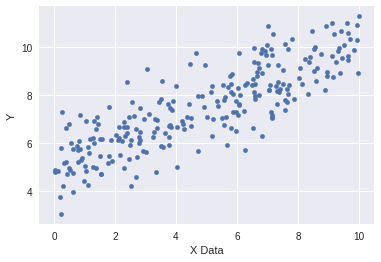

In [43]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

In [0]:
batch_size = 8 

In [45]:
np.random.randn(2)

array([0.35138958, 0.72939158])

In [0]:
m = tf.Variable(-1.11)
b = tf.Variable(0.42)



In [0]:
xph = tf.placeholder(tf.float32, [batch_size])

In [0]:
yph = tf.placeholder(tf.float32, [batch_size])

In [0]:
y_model = m*xph + b

In [0]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [0]:
train = optimizer.minimize(error)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  sess.run(init)
  
  batches = 1000
  
  
  for i in range(batches):
    rand_ind = np.random.randint(len(x_data), size=batch_size)
    
    feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
    
    sess.run(train, feed_dict = feed)
  
  model_m, model_b = sess.run([m, b])

In [55]:
model_m

0.50076544

In [56]:
model_b

4.9247003

In [0]:
y_hat = x_data*model_m + model_b

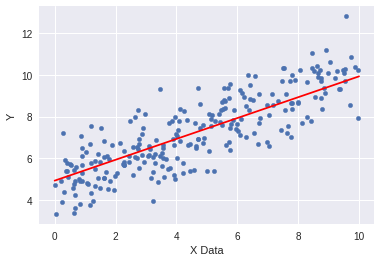

In [58]:
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat, 'r')

#tf.estimator

In [0]:
feat_cols = [ tf.feature_column.numeric_column('x', shape=[1]) ]

In [60]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp9ofvsv48', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f75f75aa208>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [64]:
print(x_train.shape)

(700000,)


In [65]:
print(x_eval.shape)

(300000,)


In [0]:
input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True )

In [0]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False )

In [0]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_eval}, y_eval, batch_size=8, num_epochs=1000, shuffle=False )

In [69]:
estimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp9ofvsv48/model.ckpt.
INFO:tensorflow:loss = 373.3292, step = 1
INFO:tensorflow:global_step/sec: 599.753
INFO:tensorflow:loss = 18.441084, step = 101 (0.174 sec)
INFO:tensorflow:global_step/sec: 703.699
INFO:tensorflow:loss = 29.065407, step = 201 (0.137 sec)
INFO:tensorflow:global_step/sec: 728.107
INFO:tensorflow:loss = 13.621352, step = 301 (0.142 sec)
INFO:tensorflow:global_step/sec: 756.364
INFO:tensorflow:loss = 7.0547314, step = 401 (0.130 sec)
INFO:tensorflow:global_step/sec: 717.364
INFO:tensorflow:loss = 10.119972, step = 501 (0.138 sec)
INFO:tensorflow:global_step/sec: 807.125
INFO:tensorflow:loss = 7.7599053, step = 601 (0.123 sec)
INFO:tensorflow:global_step/sec: 828.997
INFO:tensorflow:l

In [70]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-09-20-06:47:27
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp9ofvsv48/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-09-20-06:47:28
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0431815, global_step = 1000, label/mean = 7.47844, loss = 8.345452, prediction/mean = 7.3408656
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000:

In [71]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-09-20-06:48:29
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp9ofvsv48/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-09-20-06:48:30
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0647004, global_step = 1000, label/mean = 7.4874086, loss = 8.517603, prediction/mean = 7.3202543
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100

In [72]:
print('TRAINING DATA METRICS')
print(train_metrics)

TRAINING DATA METRICS
{'average_loss': 1.0431815, 'label/mean': 7.47844, 'loss': 8.345452, 'prediction/mean': 7.3408656, 'global_step': 1000}


In [73]:
print('EVAL METRICS')
print(eval_metrics)

EVAL METRICS
{'average_loss': 1.0647004, 'label/mean': 7.4874086, 'loss': 8.517603, 'prediction/mean': 7.3202543, 'global_step': 1000}


In [0]:
brand_new_data = np.linspace(0, 10, 10)

input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x': brand_new_data }, shuffle=False )

In [76]:
list(estimator.predict(input_fn=input_fn_predict))


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp9ofvsv48/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4878583], dtype=float32)},
 {'predictions': array([5.121574], dtype=float32)},
 {'predictions': array([5.7552896], dtype=float32)},
 {'predictions': array([6.389005], dtype=float32)},
 {'predictions': array([7.0227213], dtype=float32)},
 {'predictions': array([7.6564364], dtype=float32)},
 {'predictions': array([8.290152], dtype=float32)},
 {'predictions': array([8.923868], dtype=float32)},
 {'predictions': array([9.557584], dtype=float32)},
 {'predictions': array([10.191299], dtype=float32)}]

In [77]:
predictions = []


for pred in estimator.predict(input_fn=input_fn_predict):
  predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp9ofvsv48/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [78]:
predictions

[array([4.4878583], dtype=float32),
 array([5.121574], dtype=float32),
 array([5.7552896], dtype=float32),
 array([6.389005], dtype=float32),
 array([7.0227213], dtype=float32),
 array([7.6564364], dtype=float32),
 array([8.290152], dtype=float32),
 array([8.923868], dtype=float32),
 array([9.557584], dtype=float32),
 array([10.191299], dtype=float32)]

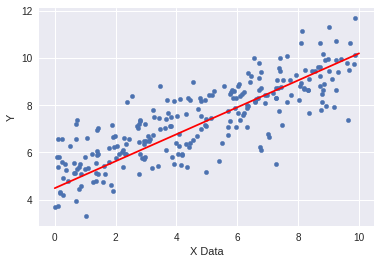

In [82]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(brand_new_data, predictions, 'r')